# State of the Union

## Topic Modeling with *topicmodels*

### Created by Lars Bernhardsson

I used the jupyter/datascience-notebook docker image found at https://hub.docker.com/r/jupyter/datascience-notebook when making this notebook.

## R session prep

In [1]:
# If you are using the jupyter/datascience-notebook docker image to run the notebooks in this repository,
# open a terminal window and run this first:
#
#   conda install r-topicmodels

library(tidyverse)
library(tm)
library(topicmodels)

options(stringsAsFactors = FALSE)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: NLP

Attaching package: ‘NLP’

The following object is masked from ‘package:ggplot2’:

    annotate



## Data

In [2]:
if(file.exists("SOTUtexts.RData")) {
    load("SOTUtexts.RData")
} else {
    stop("Run the data notebook first")
}

## Processing

In [3]:
s <- SimpleCorpus(VectorSource(d$Text))

m <- DocumentTermMatrix(
    s,
    control=list(
        removePunctuation=TRUE,
        removeNumbers=TRUE,
        stopwords=TRUE,
        stemming=TRUE,
        minWOrdLength=3
    )
)

In [4]:
lda_model <- LDA(x = m, k = 8)

In [5]:
terms(lda_model, 20)

Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8
will,year,american,will,will,will,year,will
america,will,will,year,america,america,american,american
year,work,applaus,program,american,american,work,year
must,peopl,year,american,can,must,will,job
american,american,america,govern,must,peopl,america,now
let,must,countri,tax,peopl,nation,new,can
nation,new,new,must,nation,year,that,work
world,can,one,peopl,world,secur,make,america
new,america,peopl,can,year,countri,job,peopl
can,everi,thank,now,govern,terrorist,can,make


## Visualization

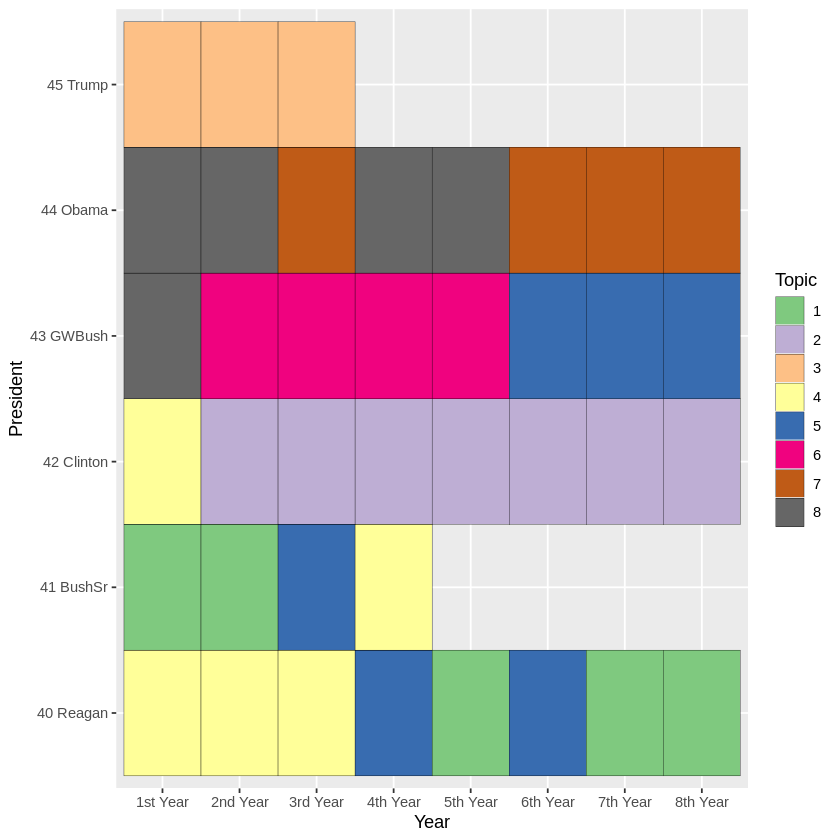

In [6]:
data.frame(President=d$President, Year=d$Year, Topic=ordered(topics(lda_model))) %>%
    ggplot(aes(x=Year, y=President, fill=Topic)) +
    scale_fill_brewer(type="qual") +
    geom_tile(color="black")